# PISA Data Exploration
### by Andreja Ho



## Table of Contents
- [Introduction](#intro)
- [Preliminary Wrangling](#wrangling)
- [Univariate Exploration](#univariate)
- [Bivariate Exploration](#bivariate)
- [Multivariate Exploration](#multivariate)

<a id='intro'></a>
## Introduction

This document explores a dataset containing PISA's 2012 data. PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school. Around 510,000 students in 65 economies globally took part in the PISA 2012 assessment of reading, mathematics, and science, representing about 28 million 15-year-olds globally. 

The students took a paper-based test that lasted 2 hours. The tests were a mixture of open-ended and multiple-choice questions that were organised in groups based on a passage setting out a real-life situation. A total of about 390 minutes of test items were covered.  Students took different combinations of different tests. They and their school principals also answered questionnaires to provide information about the students' backgrounds, schools and learning experiences and about the broader school system and learning environment.
[Source: PISA 2012](https://www.oecd.org/pisa/aboutpisa/pisa-2012-results.htm)

## Project Overview 
This project focuses on only few features of this extensive survey. For example, wealth and home possessions, cultural possessions at home, educational level of the parents, mother and father present, just to name a few. 

The purpose of this project is to highlight few comprehensive discoveries through exploratory and explanatory visuals. This project include univariate, bivariate and multivariate visualizations. An important part of data visualization is a deep understanding of different data types and ways of encoding data in order to create meaningul visualizations. 

***Important points to remember when creating visualizations:***
- Follow good design principales, ensuring that findings are conveyed accurately and clearly 
- Pay attention to cognitive load, data ink ratio and remove cart junk
- Always strive for data integrity and avoid distracting, hiding and leading to wrong conclusions
- Know level of measurements and types of data in order to choose an appropriate plot


***The Four Levels of Measurement***<br>
In order to choose an appropriate plot type or method of analysis for your data, you need to understand the types of data you have. One common method divides the data into four levels of measurement:

Qualitative or categorical types (non-numeric types)
1. **Nominal data**: pure labels without inherent order (no label is intrinsically greater or less than any other)
2. **Ordinal data**: labels with an intrinsic order or ranking (comparison operations can be made between values, but the magnitude of differences are not be well-defined)
Quantitative or numeric types
3. **Interval data**: numeric values where absolute differences are meaningful (addition and subtraction operations can be made)
4. **Ratio data**: numeric values where relative differences are meaningful (multiplication and division operations can be made)
All quantitative-type variables also come in one of two varieties: **discrete and continuous**.

Discrete quantitative variables can only take on a specific set values at some maximum level of precision.
Continuous quantitative variables can (hypothetically) take on values to any level of precision.<br>
***(Source: Udacity DAND, Lesson 2, Lecture 3: Levels of Measurments & Types of Data)***

All details of preliminary data wrangling, feature engineering, and specific visualizations are described in the chapters that follows.


<a id='wrangling'></a>
## Preliminary Wrangling

PISA 2012 dataset is very complex and the original dataset contains 485490 rows and 636 columns. For this analysis, I’ve chosen only a few columns of interest. To understand the variables (column headers), I used PISA’s data [dictionary](link) and PISA’s [codebook](https://www.oecd.org/pisa/pisaproducts/PISA-2012-technical-report-final.pdf). Both documents were necessary to choose variables of interest and how to properly interpret them. 

First, I looked through the dictionary to learn what data was gathered and define the idea of the interest. Next, I read through the codebook to decide what features or variables are best suited for the analysis.
 
I am interested in how specific features impact students’ performance on math, reading, and science testing. The features of interests are:<br>
   - wealth<br> 
   - cultural and home possessions<br>
   - educational resources<br>
   - parents’ and siblings’ presence<br>
   - the educational level of parents<br>
   - skip classes within school day<br>
   - skip whole school day<br>
  
Besides those features, I will be analyzing if there is any difference between<br>
   - gender<br>
   - schools that joined OECD<br>
   - country<br><br>

In [1]:
# Import dependencies
import numpy as np
import pandas as pd

In [2]:
#Import dependencies for vizuals
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

In [3]:
# # Read in original dataset and explore what features are most suitable for the analysis
# # THIS LINE OF CODE ID SWITCHED OFF FOR FASTER LOADING.

# df_origin = pd.read_csv('pisa2012.csv',sep=',', encoding='latin-1',error_bad_lines=False, index_col=False, dtype='unicode')
# pd.set_option('display.max_columns', None)
# df_origin.head(3)

In [4]:
# Dataset shape
# df_origin.shape

### Import only columns of interest

When I choose the columns of interest I used Excel `textjoin()` function in order to get all columns’ names in a list, separated with a comma and quotation marks. There were some issues with reading large csv file into pandas dataframe. Thus I used the following code: issues with readind the large csv: `pd.read_csv('pisa2012.csv',sep=',', encoding='latin-1',error_bad_lines=False, index_col=False, dtype='unicode')`


In [5]:
# List the columns of interest and read in csv file
col_list = ['CNT','OECD','SCHOOLID','ST04Q01','ST09Q01','ST115Q01','ST11Q01','ST11Q02','ST11Q03','ST11Q04','ANXMAT','CULTPOS','FISCED','HEDRES','HOMEPOS','MISCED','WEALTH','ANCBELONG','PV1MATH','PV1READ','PV1SCIE']
df_short = pd.read_csv('pisa2012.csv',sep=',', encoding='latin-1',error_bad_lines=False, index_col=False, dtype='unicode', usecols=col_list)

In [6]:
# Display all columns for better view and display first five columns
pd.set_option('display.max_columns', None)
df_short.head(3)

,CNT,OECD,SCHOOLID,ST04Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ANXMAT,CULTPOS,FISCED,HEDRES,HOMEPOS,MISCED,WEALTH,ANCBELONG,PV1MATH,PV1READ,PV1SCIE
0,Albania,Non-OECD,0000001,Female,None,1,Yes,Yes,Yes,Yes,0.32,-0.48,"ISCED 3A, ISCED 4",-1.29,-2.61,"ISCED 3A, ISCED 4",-2.92,-0.7351,406.8469,249.5762,341.7009
1,Albania,Non-OECD,0000001,Female,None,1,Yes,Yes,NaN,Yes,NaN,1.27,"ISCED 3A, ISCED 4",1.12,1.41,"ISCED 5A, 6",0.69,NaN,486.1427,406.2936,548.9929
2,Albania,Non-OECD,0000001,Female,None,1,Yes,Yes,No,Yes,NaN,1.27,"ISCED 5A, 6",-0.69,0.14,"ISCED 5A, 6",-0.23,NaN,533.2684,401.21,499.6643


<a id='clean'></a>
### Assess, Clean & Test

In [7]:
# Create a copy of original data sets
df = df_short.copy()

In [8]:
# Check the shape
df.shape

(485490, 21)

In [9]:
# Rename colum names for better understanding
# Columns were renamed with help of excel with `textjoin` and `concatenate` function
df.rename(columns={'CNT':'Country_code', 'OECD':'OECD_country', 'SCHOOLID':'School_ID', 'ST04Q01':'Gender', 'ST09Q01':'Truancy_Skip_whole_school_day', 'ST115Q01':'Truancy_Skip_classes_within_school_day', 'ST11Q01':'At_Home_Mother', 'ST11Q02':'At_Home_Father', 'ST11Q03':'At_Home_Brothers', 'ST11Q04':'At_Home_Sisters', 'ANXMAT':'Mathematics_Anxiety', 'CULTPOS':'Cultural_Possessions', 'FISCED':'Educational_level_of_father_ISCED', 'HEDRES':'Home_educational_resources', 'HOMEPOS':'Home_Possessions', 'MISCED':'Educational_level_of_mother_ISCED', 'WEALTH':'Wealth', 'ANCBELONG':'Sense_of_Belonging_to_School_Anchored', 'PV1MATH':'Plausible_value_mathematics', 'PV1READ':'Plausible_value_reading', 'PV1SCIE':'Plausible_value_science'}, inplace=True)

In [10]:
# Check renamed columns
df.head(3)

,Country_code,OECD_country,School_ID,Gender,Truancy_Skip_whole_school_day,Truancy_Skip_classes_within_school_day,At_Home_Mother,At_Home_Father,At_Home_Brothers,At_Home_Sisters,Mathematics_Anxiety,Cultural_Possessions,Educational_level_of_father_ISCED,Home_educational_resources,Home_Possessions,Educational_level_of_mother_ISCED,Wealth,Sense_of_Belonging_to_School_Anchored,Plausible_value_mathematics,Plausible_value_reading,Plausible_value_science
0,Albania,Non-OECD,0000001,Female,None,1,Yes,Yes,Yes,Yes,0.32,-0.48,"ISCED 3A, ISCED 4",-1.29,-2.61,"ISCED 3A, ISCED 4",-2.92,-0.7351,406.8469,249.5762,341.7009
1,Albania,Non-OECD,0000001,Female,None,1,Yes,Yes,NaN,Yes,NaN,1.27,"ISCED 3A, ISCED 4",1.12,1.41,"ISCED 5A, 6",0.69,NaN,486.1427,406.2936,548.9929
2,Albania,Non-OECD,0000001,Female,None,1,Yes,Yes,No,Yes,NaN,1.27,"ISCED 5A, 6",-0.69,0.14,"ISCED 5A, 6",-0.23,NaN,533.2684,401.21,499.6643


In [12]:
# Check basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 21 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   Country_code                            485490 non-null  object
 1   OECD_country                            485490 non-null  object
 2   School_ID                               485490 non-null  object
 3   Gender                                  485490 non-null  object
 4   Truancy_Skip_whole_school_day           479131 non-null  object
 5   Truancy_Skip_classes_within_school_day  479269 non-null  object
 6   At_Home_Mother                          460559 non-null  object
 7   At_Home_Father                          441036 non-null  object
 8   At_Home_Brothers                        400076 non-null  object
 9   At_Home_Sisters                         390768 non-null  object
 10  Mathematics_Anxiety                     314764 non-null 

***Educational level of father and mother***

Based on this [wikipedia](https://en.wikipedia.org/wiki/International_Standard_Classification_of_Education) site I have changed educational level of for better understanding and easier categorization:

| Pisa 2012 | From Wikipedia - ISCED 2011 | encoding used in this dataset
| :- | :- | :- |
|ISCED 1           | Primary education | ISCED 1
|ISCED 2           | Lower secondary education|  ISCED 2
|ISCED 3B, C       | Upper secondary education  | ISCED 3
|ISCED 3A, ISCED 4 | Post-secondary non-tertiary education   | ISCED 4
|ISCED 5B          | Short-cycle tertiary education | ISCED 5
|ISCED 5A, 6       | Bachelor's or equivalent  | ISCED 6
|None| None| None

In [14]:
# Check values for education level of father
df.Educational_level_of_father_ISCED.value_counts()

ISCED 3A, ISCED 4    118890
ISCED 5A, 6          113406
ISCED 2               66728
ISCED 5B              61617
ISCED 3B, C           39789
ISCED 1               35938
None                  16535
Name: Educational_level_of_father_ISCED, dtype: int64

In [15]:
# Check values for education level of mother
df.Educational_level_of_mother_ISCED.value_counts()

ISCED 3A, ISCED 4    126768
ISCED 5A, 6          114452
ISCED 5B              68219
ISCED 2               66650
ISCED 1               36556
ISCED 3B, C           35672
None                  18768
Name: Educational_level_of_mother_ISCED, dtype: int64

In [17]:
# Replace educational values with with easy understand values
df["Educational_level_of_father_ISCED"] \
.replace({"None" : "ISCED 0",
          "ISCED 1": "ISCED 1",
          "ISCED 2": "ISCED 2",
          "ISCED 3B, C" : "ISCED 3",
          "ISCED 3A, ISCED 4": "ISCED 4",
          "ISCED 5B": "ISCED 5",
          "ISCED 5A, 6" :"ISCED 6"}, inplace=True)

In [18]:
# Replace educational values with easy understand values
df["Educational_level_of_mother_ISCED"] \
.replace({"None" : "ISCED 0",
          "ISCED 1": "ISCED 1",
          "ISCED 2": "ISCED 2",
          "ISCED 3B, C" : "ISCED 3",
          "ISCED 3A, ISCED 4": "ISCED 4",
          "ISCED 5B": "ISCED 5",
          "ISCED 5A, 6" :"ISCED 6"}, inplace=True)

***Truancy Skip whole school day***

In [19]:
# Check values for Truancy Skip whole school day
df.Truancy_Skip_whole_school_day.value_counts()

None                     385998
One or two times          75969
Three or four times       10882
Five or more times         6282
Name: Truancy_Skip_whole_school_day, dtype: int64

In [20]:
# Replace Truancy_Skip_whole_school_day values with with easy understand values
df["Truancy_Skip_whole_school_day"] \
.replace({"Five or more times": "5+ times",
          "Three or four times": "3-4 times",
          "One or two times" : "1-2 times",
          "None": "0 times"}, inplace=True, regex=True)

*Issue with concerting "Truancy_Skip_whole_school_day" column to categorical datatype. Same code was used but unable to convert. Note: Pay attention when making visualizations in case of errors. Update: Issue found on [Stackoverflow](https://stackoverflow.com/questions/37593550/replace-method-not-working-on-pandas-dataframe) - regex=True was nedded!*

In [21]:
# Check for correct transformation
df.Truancy_Skip_whole_school_day.value_counts()

0 times        385998
1-2 times       75969
3-4 times       10882
5+ times         6282
Name: Truancy_Skip_whole_school_day, dtype: int64

***Check countries - values***

In [22]:
#pd.set_option('display.max_rows', None) - THIS LINE OF CODE WAS SWITCHED OFF FOR SHORTER DISPLAY
# Assess the county columns to perform necessary cleaning
df.Country_code.value_counts().sort_index(ascending=False)

Vietnam                      4959
Uruguay                      5315
United States of America     4978
United Kingdom              12659
United Arab Emirates        11500
                            ...  
Belgium                      8597
Austria                      4755
Australia                   14481
Argentina                    5908
Albania                      4743
Name: Country_code, Length: 68, dtype: int64

In [24]:
# Combine country names that have been broken down by states or cities with one unique name of the country
df = df.replace(['Connecticut (USA)', 'Florida (USA)', 'Massachusetts (USA)', 'United States of America'], 'USA')
df = df.replace(['Chinese Taipei'], 'Taiwan')
df = df.replace(['China-Shanghai', 'Hong Kong-China', 'Macao-China'], 'China')
df = df.replace(['Russian Federation', 'Perm(Russian Federation)'], 'Russia')

In [25]:
# Check for the right transformation
#df.Country_code.value_counts().sort_index(ascending=False)

<a id='datatypes'></a>
### Levels of Measurement and Datatypes
It is important to change datatypes into appropriate datatypes for several reasons
- faster performance
- lower usage of the memory
- efficient computation and usage of Python's and pandas' functions

In [26]:
# Check datatype and other properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 21 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   Country_code                            485490 non-null  object
 1   OECD_country                            485490 non-null  object
 2   School_ID                               485490 non-null  object
 3   Gender                                  485490 non-null  object
 4   Truancy_Skip_whole_school_day           479131 non-null  object
 5   Truancy_Skip_classes_within_school_day  479269 non-null  object
 6   At_Home_Mother                          460559 non-null  object
 7   At_Home_Father                          441036 non-null  object
 8   At_Home_Brothers                        400076 non-null  object
 9   At_Home_Sisters                         390768 non-null  object
 10  Mathematics_Anxiety                     314764 non-null 

In [27]:
# Check for null values
df.isnull().sum()

Country_code                                   0
OECD_country                                   0
School_ID                                      0
Gender                                         0
Truancy_Skip_whole_school_day               6359
Truancy_Skip_classes_within_school_day      6221
At_Home_Mother                             24931
At_Home_Father                             44454
At_Home_Brothers                           85414
At_Home_Sisters                            94722
Mathematics_Anxiety                       170726
Cultural_Possessions                       14133
Educational_level_of_father_ISCED          32587
Home_educational_resources                  7718
Home_Possessions                            5683
Educational_level_of_mother_ISCED          18405
Wealth                                      5893
Sense_of_Belonging_to_School_Anchored     177850
Plausible_value_mathematics                    0
Plausible_value_reading                        0
Plausible_value_scie

*Initially Sense of Belonging to School_Anchored (177850) and  Mathematics Anxiety (170726) were about to be included into data analysis. However, those two variables have too many null values and dropping too many data points might cause anomalies in the dataset.For this reason I won't include these two features into my analysis and continue my analysis withoyt these two features.*

In [28]:
# Drop columns Sense_of_Belonging_to_School_Anchored and Mathematics_Anxiety
df.drop(['Sense_of_Belonging_to_School_Anchored', 'Mathematics_Anxiety'], axis=1, inplace=True)

In [29]:
# Drop null values
df.dropna(inplace=True)

In [30]:
# Check data shape
df.shape

(325497, 19)

In [31]:
# Change Educational_level_of_father_ISCED to categorical datatype
educational_classes = ['ISCED 0', 'ISCED 1', 'ISCED 2', 'ISCED 3', 'ISCED 4', 'ISCED 5', 'ISCED 6']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = educational_classes)
df['Educational_level_of_father_ISCED'] = df['Educational_level_of_father_ISCED'].astype(vclasses)

In [32]:
# Change Educational_level_of_father_ISCED to categorical datatype
educational_classes = ['ISCED 0','ISCED 1', 'ISCED 2', 'ISCED 3', 'ISCED 4', 'ISCED 5', 'ISCED 6']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = educational_classes)
df['Educational_level_of_mother_ISCED'] = df['Educational_level_of_mother_ISCED'].astype(vclasses)

In [33]:
df.Truancy_Skip_whole_school_day.value_counts()

0 times        265667
1-2 times       49357
3-4 times        6774
5+ times         3699
Name: Truancy_Skip_whole_school_day, dtype: int64

In [34]:
# # Change Truancy_Skip_whole_school_day to categort datatype
# skip_school_day = ['0 times', '1-2 times', '3-4 times', '5+ times']
# categorical_variable = pd.api.types.CategoricalDtype(ordered = True, categories = skip_school_day)
# df['Truancy_Skip_whole_school_day'] = df['Truancy_Skip_whole_school_day'].astype(categorical_variable)

In [35]:
#df.Truancy_Skip_whole_school_day.value_counts()

*Issue with converting "Truancy_Skip_whole_school_day" column to categorical datatype. The same code was used but unable to convert. Note: Pay attention when making visualizations in case of errors.*

In [36]:
# Chenge mother, father, brothers, sisters at home variebles to boolean
home = {'Yes': True, 'No': False}
df["At_Home_Mother"].replace(home, inplace=True)
df["At_Home_Father"].replace(home, inplace=True)
df["At_Home_Brothers"].replace(home, inplace=True)
df["At_Home_Sisters"].replace(home, inplace=True)

In [37]:
# Using dictionary to convert specific columns into different datatypes
convert_dict = {'Truancy_Skip_classes_within_school_day': int,
                'Cultural_Possessions' : float,
                'Home_educational_resources': float,
                'Home_Possessions': float,
                'Wealth': float,
                'Plausible_value_mathematics' : float,
                'Plausible_value_reading': float,
                'Plausible_value_science' : float,      
               }
df = df.astype(convert_dict)

In [39]:
# Check for successful conversion of datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325497 entries, 0 to 485489
Data columns (total 19 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   Country_code                            325497 non-null  object  
 1   OECD_country                            325497 non-null  object  
 2   School_ID                               325497 non-null  object  
 3   Gender                                  325497 non-null  object  
 4   Truancy_Skip_whole_school_day           325497 non-null  object  
 5   Truancy_Skip_classes_within_school_day  325497 non-null  int32   
 6   At_Home_Mother                          325497 non-null  bool    
 7   At_Home_Father                          325497 non-null  bool    
 8   At_Home_Brothers                        325497 non-null  bool    
 9   At_Home_Sisters                         325497 non-null  bool    
 10  Cultural_Possessions            

### Feature engineering
For more concise data analysis I create the following new features.

In [40]:
# Create overall score
df['Overall_score'] = ((df.Plausible_value_mathematics + df.Plausible_value_reading + df.Plausible_value_science) / 3)

In [41]:
# Create single parent column
df['Single_parent'] = np.where((df['At_Home_Mother'] == True) & (df['At_Home_Father'] == True), False, True)

In [42]:
# Create single child column
df['Single_child'] = np.where((df['At_Home_Brothers'] == False) & (df['At_Home_Sisters'] == False), True, False)

In [43]:
# Create parent higest education column
df['Parent_highest_education'] = df[["Educational_level_of_father_ISCED", "Educational_level_of_mother_ISCED"]].max(axis=1)

In [44]:
# Change Parent highest education to categorical datatype
educational_classes = ['ISCED 0','ISCED 1', 'ISCED 2', 'ISCED 3', 'ISCED 4', 'ISCED 5', 'ISCED 6']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = educational_classes)
df['Parent_highest_education'] = df['Parent_highest_education'].astype(vclasses)

In [45]:
# Check dataframe for accuraccy
df.sample(3)

,Country_code,OECD_country,School_ID,Gender,Truancy_Skip_whole_school_day,Truancy_Skip_classes_within_school_day,At_Home_Mother,At_Home_Father,At_Home_Brothers,At_Home_Sisters,Cultural_Possessions,Educational_level_of_father_ISCED,Home_educational_resources,Home_Possessions,Educational_level_of_mother_ISCED,Wealth,Plausible_value_mathematics,Plausible_value_reading,Plausible_value_science,Overall_score,Single_parent,Single_child,Parent_highest_education
369935,New Zealand,OECD,0000056,Female,3-4 times,1,True,True,True,True,-1.51,ISCED 3,-1.29,-0.17,ISCED 2,0.84,402.9522,392.5520,433.6442,409.716133,False,False,ISCED 3
320198,Mexico,OECD,0000192,Male,0 times,1,True,True,True,True,0.25,ISCED 1,1.12,-0.19,ISCED 4,-0.40,392.2028,421.8049,411.6374,408.548367,False,False,ISCED 4
266764,Italy,OECD,0000997,Male,0 times,1,True,True,False,False,-0.48,ISCED 4,-1.29,-0.39,ISCED 4,0.31,490.3490,412.4221,505.1660,469.312367,False,True,ISCED 4


In [46]:
# drop unceccessary columns
df.drop(['At_Home_Mother', 'At_Home_Father', 'At_Home_Brothers', 'At_Home_Sisters'], axis=1, inplace=True)

In [47]:
# Check data shape
df.shape

(325497, 19)

<a id='store'></a>
### Storing Data

In [48]:
# Export final dataframe into external csv file 
df.to_csv("Data/clean_PISA_df.csv", index=False)

<a id='features'></a>
### QUESTIONS
### What is the structure of your dataset?

After preliminary data-wrangling cleaned PISA data set contains 325497 rows and 19 columns.
- 325497 rows represent students that took place in PISA 2012. 
- 19 columns or feature of interests are:


| feature | converted datatype | 
| :- | :- |                   
OECD_country     |     bool  |               
School_ID |       object  |                     
Gender  |       object     |                    
Truancy_Skip_whole_school_day    |      object |
Truancy_Skip_classes_within_school_day  | int |
Single_parent     |                  bool |
Single_child    |                     bool |
Cultural_Possessions   |                float |
Educational_level_of_father_ISCED    | category  |
Home_educational_resources  |            float |
Home_Possessions     |                   float |
Educational_level_of_mother_ISCED       | category |
Wealth   |                               float |
Plausible_value_mathematics    | float     |   
Plausible_value_reading    |             float |
Plausible_value_science  | float |
Overall_score | float |

When reading the csv file to pandas data frame all features came as object datatypes. For more efficient computations and memory usage, I changed object datatypes to more appropriate datatypes as shown in the table above.

Cultural Possessions, Home educational resources, Home Possessions and Wealth are numeric types of variables. The values represent index values ranging from small negative number to small positive number. The smaller the number the lower value of the indices. Home possessions variable represent the sum of all three variables (whealth, cultural possessions and home educational possessions). Figure below shows the wording of items and their allocation of the four indices.


### What is/are the main feature(s) of interest in your dataset?

After initial data wrangling and initial data assessing, I decided what is my main point of interest. I am interested in how specific features impact students’ performance on math, reading, and science testing. For example, do features such as wealth, cultural possession, home educational resources, and home possessions have a positive or negative impact on students’ scores in math, reading, and science. Additionally, I am interested in the correlation between students’ scores and the educational level of the parents. Moreover, I will explore if the absence of mother, father, and siblings affects students’ scores. Taking all mentioned features into account I am interested if there is a difference between genders, countries, and countries that joined OECD.

OECD = Organisation for Economic Co-operation and Development



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that students who belong to OECD countries and whose wealth and other home possessions are higher will perform better on testing. Additionally, I expect that students whose parents have higher education will also perform better on the testing. I assume that there is no difference between genders.  

<a id='univariate'></a>
## Univariate Exploration

I will start my data exploration with univariate exploration or visualizations of single variables. By looking at one variable at a time we can build an intuition for how each variable is distributed before moving on to more complicated interactions between variables. The main point for univariate exploration is to explore the variables that will be the key to answering research questions. In case that I will observe any oddities in the data such as outliers, or missing values, additional cleaning and further inspection will be needed. 

I will focus on the following charts:
- Bar charts for qualitative variables
- Histograms for quantitative variables
- Pie charts to depict relative frequencies for levels of a categorical variable


In [332]:
# Define colors for consistency
colors = ['#90b1c8','#baae97']
color1 = ['#90b1c8']
color2 = ['#baae97']
color3 = ['#ad6d2f']

### OECD country, Gender and Single Parents Distribution

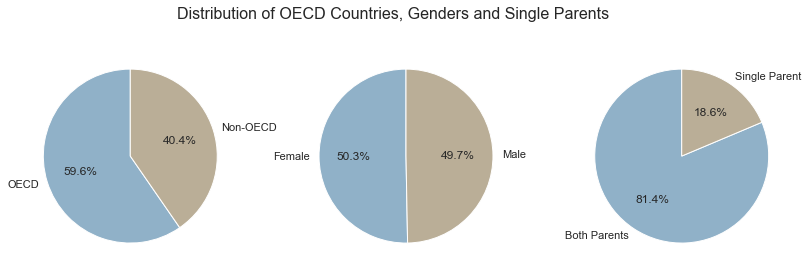

In [340]:
# Plot pie charts for disribution 
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14, 4))
ax1.pie(df['OECD_country'].value_counts(), colors = colors, labels=['OECD', 'Non-OECD'], autopct='%1.1f%%', startangle=90);
ax2.pie(df['Gender'].value_counts(), colors = colors, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90);
ax3.pie(df['Single_parent'].value_counts(), colors = colors, labels=['Both Parents', 'Single Parent'], autopct='%1.1f%%', startangle=90);
plt.suptitle('Distribution of OECD Countries, Genders and Single Parents', y=1.02, fontsize=16);

*There are slightly more countries that joined OECD - 59.6% in comparison to countries that have not joined OECD 40.4%.*<br>
*There is an equal distribution for both genders in this dataset.*<br>
*81.4% of students have both parents and 18.6% of students live in single-parent households.*

In [330]:
# # Distribution of OECD countries
# fig, ax = plt.subplots(figsize=(4, 4))
# ax.pie(df['OECD_country'].value_counts(), colors = colors, labels=['OECD', 'Non-OECD'], autopct='%1.1f%%', startangle=90);
# ax1.axis('equal');
# plt.tight_layout();
# plt.title('OECD Countries distribution', fontsize = 14)
# plt.show();

In [331]:
# # Distribution of gender
# fig, ax = plt.subplots(figsize=(4, 4))
# ax.pie(df['Gender'].value_counts(), colors = colors, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90);
# ax1.axis('equal');
# plt.tight_layout();
# plt.title('Gender distribution', fontsize = 14)
# plt.show();

In [333]:
# ## Single Parents distribution
# fig, ax = plt.subplots(figsize=(4, 4))
# ax.pie(df['Single_parent'].value_counts(), colors = colors, labels=['Both Parents', 'Single Parent'], autopct='%1.1f%%', startangle=90);
# ax1.axis('equal');
# plt.tight_layout();
# plt.title('Single Parents distribution', fontsize = 14)
# plt.show();

### Math, Reading and Science scores distribution

In [73]:
# descriptive statistics for math, reading and science scores 
df.Plausible_value_mathematics.describe(), df.Plausible_value_reading.describe(), df.Plausible_value_science.describe()           

(count    325497.000000
 mean        480.433085
 std         102.667809
 min          71.124800
 25%         406.535300
 50%         477.652300
 75%         551.885000
 max         962.229300
 Name: Plausible_value_mathematics, dtype: float64,
 count    325497.000000
 mean        481.557202
 std         100.285503
 min           0.083400
 25%         413.918900
 50%         484.692000
 75%         552.762500
 max         904.802600
 Name: Plausible_value_reading, dtype: float64,
 count    325497.00000
 mean        485.68416
 std         100.14623
 min           6.84450
 25%         414.80790
 50%         485.67700
 75%         557.29210
 max         903.33830
 Name: Plausible_value_science, dtype: float64)

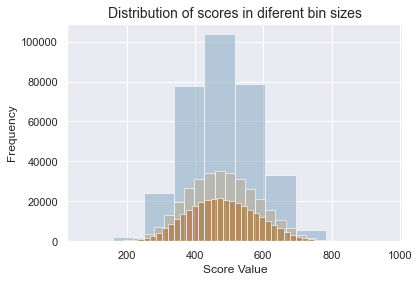

In [83]:
# Histogram for distribution of math, reading and science scores -  deciding on appropriate binning
plt.hist(data = df, x = 'Plausible_value_mathematics', bins = 10, color = color1, alpha=.6);
plt.hist(data = df, x = 'Plausible_value_mathematics', bins = 30, color = color2, alpha=.6);
plt.hist(data = df, x = 'Plausible_value_mathematics', bins = 50, color = color3, alpha=.6);
plt.ylabel('Frequency')
plt.xlabel('Score Value')
plt.title('Distribution of scores in diferent bin sizes', fontsize=14);

*After exploring what bin size is the most appropriate I chose a bin size that equals to 30.*

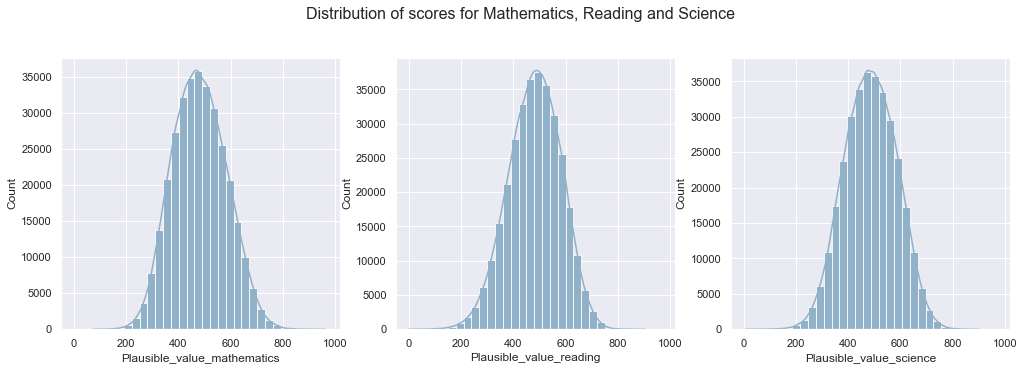

In [338]:
# Plot the distribution of math, reading, science and overall scores
fig, axs = plt.subplots(ncols=3, figsize=(17, 5), sharex=True) 
sns.histplot(df.Plausible_value_mathematics, kde=True, binwidth=30, ax=axs[0], color = color1, alpha=1);
sns.histplot(df.Plausible_value_reading, kde=True, binwidth=30, ax=axs[1], color = color1, alpha=1);
sns.histplot(df.Plausible_value_science, kde=True, binwidth=30, ax=axs[2], color = color1, alpha=1);
plt.suptitle('Distribution of scores for Mathematics, Reading and Science', y=1.02, fontsize=16);

*Math, Reading and Science scores are normaly distributed.*

### Educational status of the parents

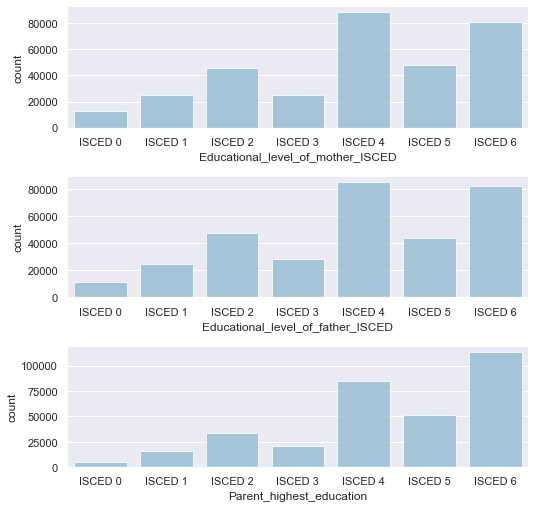

In [341]:
# Plot educational levels of parents.
fig, ax = plt.subplots(nrows=3, figsize = [8,8])

default_color = sns.color_palette('Blues')[2]
sns.countplot(data = df, x = 'Educational_level_of_mother_ISCED', color = default_color, ax = ax[0], alpha = 0.8)
sns.countplot(data = df, x = 'Educational_level_of_father_ISCED', color = default_color, ax = ax[1], alpha = 0.8)
sns.countplot(data = df, x = 'Parent_highest_education', color = default_color, ax = ax[2], alpha = 0.8)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

From the chart above we can see that both parents have similar education levels. Most parents have level 4 or level 6 educational level, while a small portion of parents has a lower educational level than level 1. The third chart represents parents’ highest educational level. The feature was created in taking the highest level on either parent. We observe a similar distribution of educational levels. 

### Wealth and Home possesions

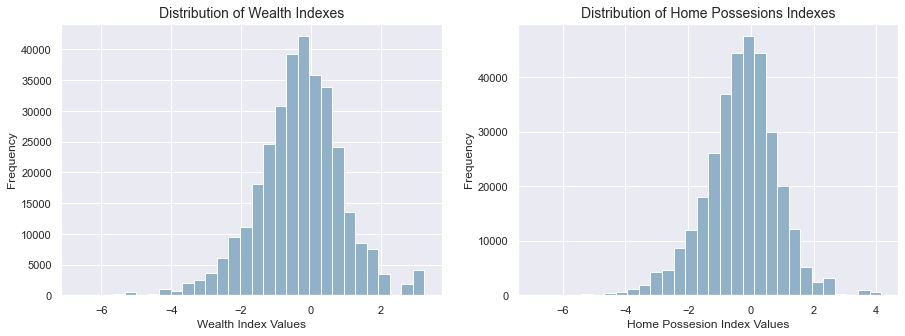

In [200]:
# Define figure size
plt.figure(figsize = [15, 5])

# Distribution of Wealth feature
plt.subplot(1, 2, 1)
plt.hist(data = df, x = 'Wealth', bins = 30, color = color1, alpha=1);
plt.ylabel('Frequency')
plt.xlabel('Wealth Index Values')
plt.title('Distribution of Wealth Indexes', fontsize=14);

# Histogram for Home_Possessions
plt.subplot(1, 2, 2)
plt.hist(data = df, x = 'Home_Possessions', bins = 30, color = color1, alpha=1);
plt.ylabel('Frequency')
plt.xlabel('Home Possesion Index Values')
plt.title('Distribution of Home Possesions Indexes', fontsize=14);

*From the charts above we can observe a somewhat normal distribution of index value for Wealth and Home Possessions with slightly extended tails on each side. Additionally box plots can give us a better idea about those extreme values.*

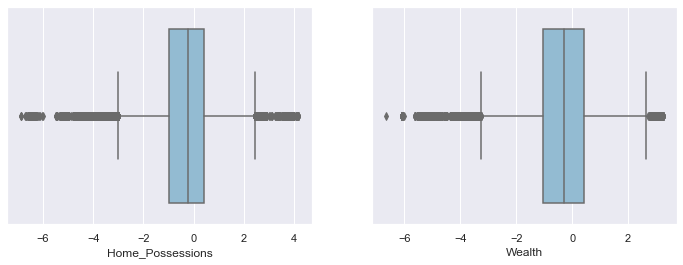

In [210]:
# Define figure size
plt.figure(figsize = [12, 4])

# Box plot for home possesions
plt.subplot(1, 2, 1)
sns.boxplot(data = df, x = 'Home_Possessions' , color = default_color);

# Box plot for Wealth
plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'Wealth', color = default_color);

*From the box plots above we can observe some extreme values on each side of the “normal distribution” for the features Wealth and Home Possesions.*

### Cultural possessions and Home educational resources

**Cultural possessions**

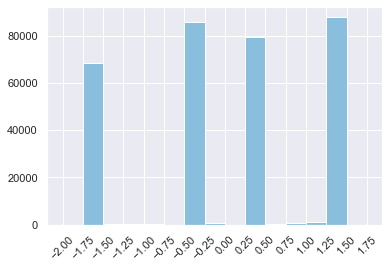

In [128]:
# Create bins with step-size 
bins = np.arange(-2.0, df['Cultural_Possessions'].max()+0.5, 0.25)
plt.hist(data = df, x = 'Cultural_Possessions', bins = bins, color = default_color);
plt.xticks(np.arange(-2, 2, 0.25), rotation = 45);

In [130]:
# Check value counts for cultular possesions
df.Cultural_Possessions.value_counts()

 1.27    87864
-0.48    86074
 0.25    78963
-1.51    68521
 0.48      668
 1.01      579
 1.11      437
 0.97      393
-0.15      356
 0.78      332
 0.72      272
-1.17      272
-0.18      205
-0.03      190
-1.31      177
-1.33       89
-0.83       43
-1.08       40
-0.78       22
Name: Cultural_Possessions, dtype: int64

In [129]:
# Check descriptive statistics for cultular possesions
df.Cultural_Possessions.describe()

count    325497.000000
mean         -0.037138
std           0.999548
min          -1.510000
25%          -0.480000
50%           0.250000
75%           1.270000
max           1.270000
Name: Cultural_Possessions, dtype: float64

In [131]:
# Create bins for Cultural possessions based on descriptive statistics
bin_names = ['Low', 'Medium', 'High']
bin_edges = [-1.51, -0.48, 0.25, 1.27]
df['Cultural_Possessions_bin'] = pd.cut(df['Cultural_Possessions'], bin_edges, labels=bin_names)

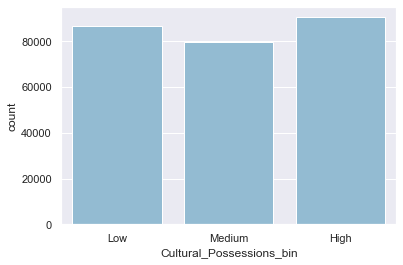

In [134]:
# Create a plot of newly created bins
sns.countplot(data=df, x='Cultural_Possessions_bin', color = default_color);

*Cultural possession values seem to be discrete in nature. For this reason I decided to group them into bins based on descriptive statistics.*

**Home educational resources**

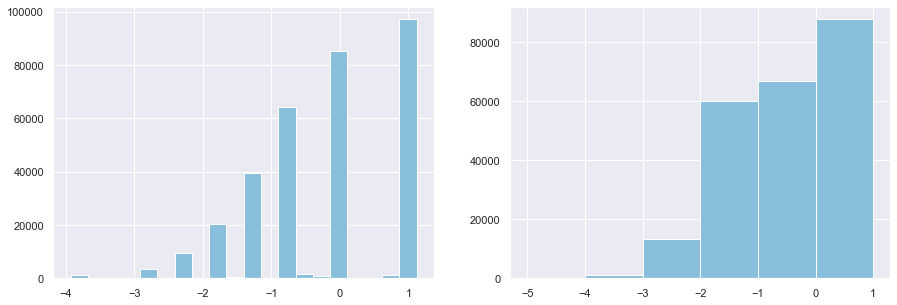

In [335]:
plt.figure(figsize= [15,5])

# Histogram for Home_educational_resources 
plt.subplot(1, 2, 1)
plt.hist(data = df, x = 'Home_educational_resources', bins = 20, color = default_color);

# Adjust bin size for better visualizaion
plt.subplot(1, 2, 2)
bins = np.arange(-5, df['Home_educational_resources'].max()+0.05, 1)
plt.hist(data = df, x = 'Home_educational_resources', bins = bins, color = default_color);
plt.xticks(np.arange(-5, 2, 1));

*From  the first chart we can see that the distribution of values is more or less discrete and the current x ticks arrangement displays quite a bit of noise. For this reason I decided to adjust x tick marks to avoid plotting the noise of the data. In the second graph I fixed the range of values on the x axis to get clearer value distributions that are easier to read.<br><br>
From the second chart we can see that the majority of students have a high index of home possession values, meaning that a low number of students have an index lower than -1. In my further research I want to see how the scores are affected by home possession or if there is any correlation between home possession and overall scores.*


In [145]:
# Check distribution for home educational resources
df.Home_educational_resources.describe()

count    325497.000000
mean         -0.179150
std           1.073313
min          -3.930000
25%          -0.690000
50%           0.040000
75%           1.120000
max           1.120000
Name: Home_educational_resources, dtype: float64

In [148]:
# Create bins for Home_educational_resources based on descriptive statistics
bin_names_h = ['Low', 'Medium', 'High']
bin_edges_h = [-3.93, -0.69, 0.04, 1.12]
df['Home_educational_resources_bin'] = pd.cut(df['Home_educational_resources'], bin_edges_h, labels=bin_names_h)

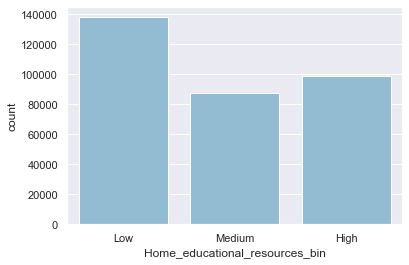

In [149]:
# Create a plot of newly created bins
sns.countplot(data=df, x='Home_educational_resources_bin', color = default_color);

*From the chart above we can see that cultural possession is polarized with a high count of students in each bin. From the chart of home educational resources, we can observe that majority of students fall into the category of low index value for home educational resources.*

### Skip whole school day or individual classes within school days

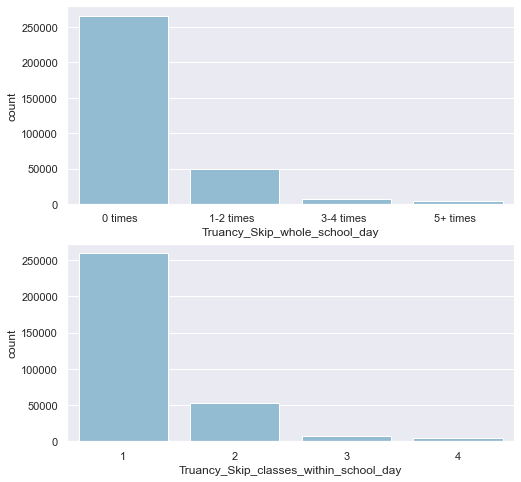

In [368]:
# Plot count of students who skipped certain amount of days or classes
fig, ax = plt.subplots(nrows=2, figsize = [8,8])
default_color = sns.color_palette('Blues')[2]
sns.countplot(data = df, x = 'Truancy_Skip_whole_school_day', color = default_color, ax = ax[0])
sns.countplot(data = df, x = 'Truancy_Skip_classes_within_school_day', color = default_color, ax = ax[1])
plt.show()

*From the chart above we can see most of the students didn’t skip any school day and didn’t skip more than 1 class. Only few students skipp more than 5 days and skip more than 4 classes during school day.*

In [155]:
# Check the distribution of skip classes within school day from dataset before cleaning
df_short.ST115Q01.value_counts()

1    378576
2     81343
3     12216
4      7134
Name: ST115Q01, dtype: int64

*Since there were no values that indicate that students skip no classes I wanted to make sure that those values weren’t deleted when dropping null values. I made a copy of a dataset before cleaning and I could check on the original data to see if the distribution of values are correct. The distribution of variables are similar in original data set and data set after cleaning.*

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Most of the variables were pretty straight forward and didn’t require much modification besides data type transformation and renaming names for better understanding. I also perform feature engineering for the following variables: overall score (average of math, reading and science score), paren highest education (highest education level of a parent), single parent and single child.   

The next four indices required some work in order to successfully perform data analysis: Cultural Possessions, Home educational resources, Home Possessions and Wealth. Since home possessions summarize all three values (wealth, cultural possessions and home possessions) and the values are continuous representing vast values form -0.39 to 2.16 and seemed normary distributed I left it as is. Similarly I did with wealth feature. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Cultural possessions and home educational possessions appeared to be more discrete in nature and values are clustered around certain numbers I decided to group them in 3 and 4 categories respectively, based on descriptive statistics. In this case I could use them in different visuals where chart require one qualtitative and one quantitative variable. 

<a id='bivariate'></a>
## Bivariate Exploration

With bivariate exploration, I continue to explore my insights of a previous chapter of univariate visualizations. Bivariate visualizations are those that involve two variables and are used to look at relationships. When a value of one variable changes we can expect some changes in another variable. Question to keep in mind when creating bivariate visuals: Are there consistent patterns and trends? Are there multiple clusters in which our data points fall? 

Three major bivariate plots:
- Scatter plots for quantitative variable vs. quantitative variables
- Violin plots for quantitative vs. qualitative variables
- Clustered bar chart qualitative vs qualitative variables

In [156]:
# Define quantitative variables and categorical variables 
numeric_vars = ['Plausible_value_mathematics', 'Plausible_value_reading', 'Plausible_value_science', 'Home_Possessions', 'Wealth', 'Overall_score']
categoric_vars = ['OECD_country', 'Parent_highest_education', 'Gender', 'Single_parent', 'Single_child', 'Home_educational_resources_bin', 'Cultural_Possessions_bin']

## Correlation plot and scatter plot matrix

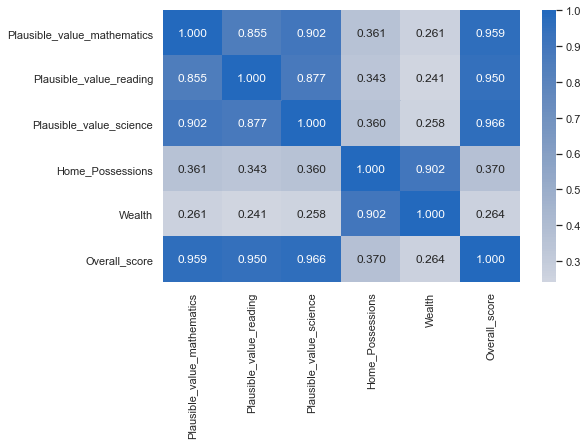

In [164]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

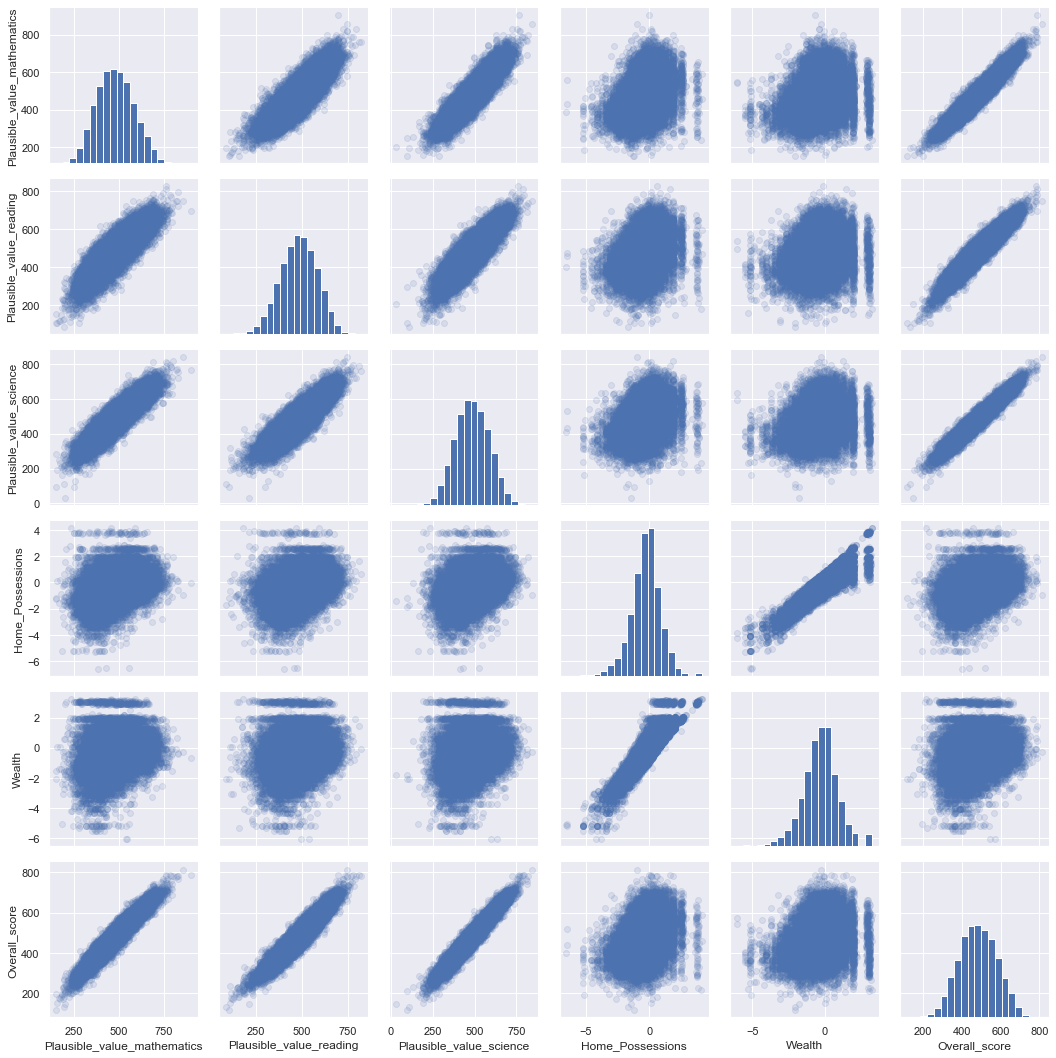

In [290]:
# Plot scatter plot grid
sample = df.sample(frac=0.05, replace=False, random_state=1)
g = sns.PairGrid(data = sample, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter, alpha = 1/8);

*For a quick look into distribution of quantitative variables, scatter plot matrices and correlation plots are a great way to get lots of information about the data. As expected there is a high positive correlation between math, reading, science and overall scores and high positive correlation between wealth and home possessions. What is less clear from the scatter plot matrix is correlation between home possessions and scores and cultural possessions and reading scores. In this case those charts need more in depth research and. I decided to plot a single scatterplot for certain  variables to get a better understanding.*

### Correlation between Overall score and Home possessions

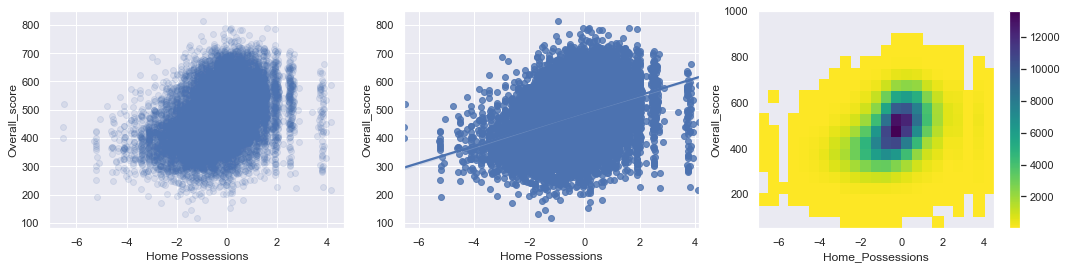

In [379]:
plt.figure(figsize = [18, 4])

# Scatter plot between scores and whealth and home possesions - sampling and transperancy 
plt.subplot(1, 3, 1)
sample = df.sample(frac=0.05, replace=False, random_state=1)
plt.scatter(data = sample, y = 'Overall_score', x = 'Home_Possessions', alpha = 1/8);
plt.ylabel('Overall_score')
plt.xlabel('Home Possessions')

# Scatter plot between overall scores and home possesions - regression line 
ax = plt.subplot(1, 3, 2)
sample = df.sample(frac=0.05, replace=False, random_state=1)
sns.regplot(data = sample, y = 'Overall_score', x = 'Home_Possessions');
plt.ylabel('Overall_score')
plt.xlabel('Home Possessions')

# Heat map between scores and whealth and home possesions
ax = plt.subplot(1, 3, 3)
bins_y = np.arange(50, 1000+50, 50)
bins_x = np.arange(-7, 4+1, 0.5)

plt.hist2d(data = df, y = 'Overall_score', x = 'Home_Possessions', cmap='viridis_r', cmin=0.5, bins = [bins_x, bins_y])
plt.colorbar()
plt.ylabel('Overall_score')
plt.xlabel('Home_Possessions');

*From the correlation matrix plot we can see slight positive correlation between home possession and overall score. Sometimes the Pearson coefficient itself does not provide clear results and interpretation can be a bit misleading sometimes. From the Scatter plot matrix above the correlation between home possessions and overall scores is not very clear. To the basic scatter plot I made a few adjustments to highlight the relationship between those two variables.<br><br>
This dataset contains many data points. Plotting all data points it’s quite illegible. For this reason I choose to plot only 5% of the data points. In the second plot I plotted a regression line that indicates a slight positive relationship between variables. In the third plot I plotted a 2D scatter plot or heat map with a clear distinction of where the majority of data points lie.*

## Violin and Box Plots for quantitative vs qualitative variables


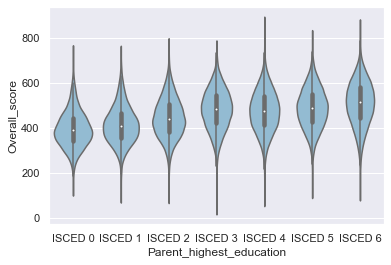

In [380]:
# violin plots
sns.violinplot(data=df, x='Parent_highest_education', y='Overall_score', color = default_color);

*For plotting quantitative vs. qualitative variables I choose violin plots. From the chart above we can see the distribution of overall scores in each parent's highest education category. We can see the trend that students whose parents have the lowest educational level score lower than students whose parents have higher educational level. Interesting observation is that students whose parents' educational level is 4 (Post-secondary non-tertiary education) have the highest range of scores.*

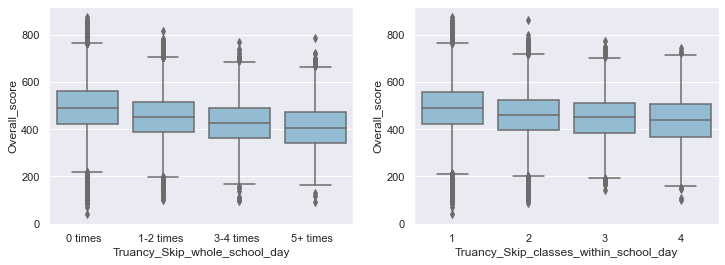

In [354]:
# Define figure size
plt.figure(figsize = [12, 4])

# Box plot for home possesions
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Truancy_Skip_whole_school_day', y='Overall_score', color = default_color);

# Box plot for Wealth
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Truancy_Skip_classes_within_school_day', y='Overall_score', color = default_color);

*Boxplots are another great way to plot and compare categorical and quantitative variables. It is easy to compare median amongst other categories. From the chart we can observe that students who skip less classes or school days tend to score higher on the tests.*

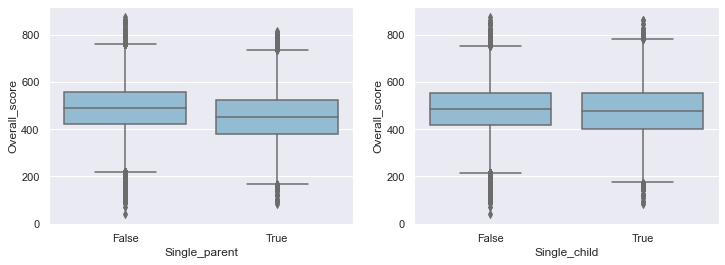

In [357]:
# Define figure size
plt.figure(figsize = [12, 4])

# Box plot for Single_parent
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Single_parent', y='Overall_score', color = default_color);

# Box plot for Single_child'
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Single_child', y='Overall_score', color = default_color);

*There is a slightly lower overall score amongst single parent students than amongst students with both parents. However the score range is higher amongst students who have both parents present. That difference could be due to uneven distribution of single and not-single parent students. From the univariate data exploration we learned that only 18.6% are single parents.* 

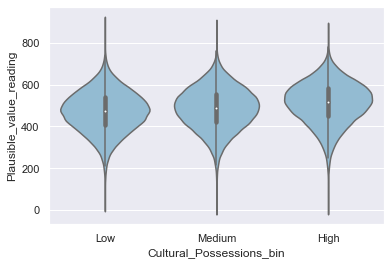

In [271]:
# violin plots
base_color = sns.color_palette()[0]
sns.violinplot(data=df, x='Cultural_Possessions_bin', y='Plausible_value_reading',color = default_color);

*Other variables of interest are cultural possessions and reading scores. From the violin plots we can see that students with a higher index of cultural possessions tend to score higher on reading tests.*

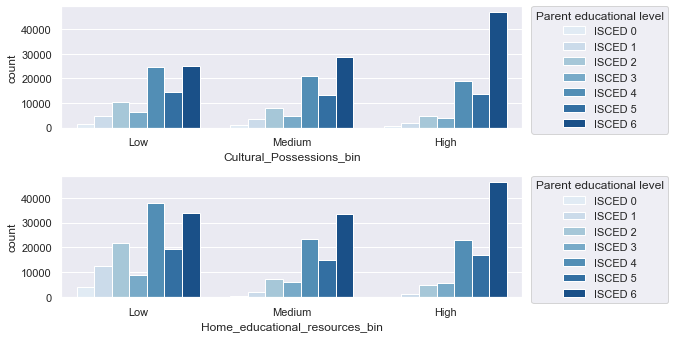

In [305]:
plt.figure(figsize = [8, 8])

# subplot 1: Cultural_Possessions_bin', vs 'Parent_highest_education'
plt.subplot(3, 1, 1)
sns.countplot(data = df, x = 'Cultural_Possessions_bin', hue = 'Parent_highest_education', palette = 'Blues')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Parent educational level')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

# subplot 2: Home_educational_resources_bin', vs 'Parent_highest_education
ax = plt.subplot(3, 1, 2)
sns.countplot(data = df, x = 'Home_educational_resources_bin', hue = 'Parent_highest_education', palette = 'Blues')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Parent educational level')
#ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

plt.show()

*For plotting qualitative vs qualitative variables I choose clustered bar charts. From the chart we can see index values of home educational resources and cultural possession  with the relationship of parent highest education. An interesting observation from the chart is that the majority of students whose parents have the highest education also have the highest index of culular of home educational resources.*

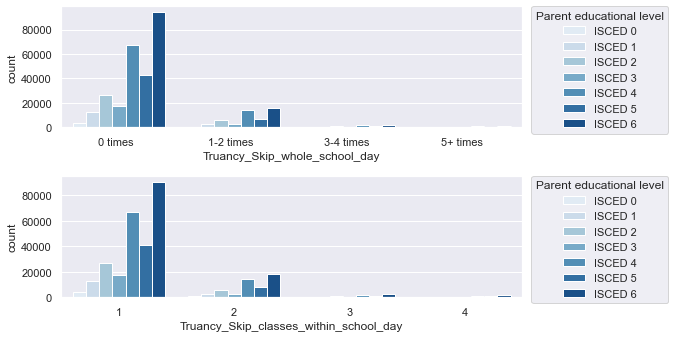

In [356]:
plt.figure(figsize = [8, 8])
# subplot 1: Truancy_Skip_whole_school_day', vs 'Parent_highest_education
plt.subplot(3, 1, 1)
sns.countplot(data = df, x = 'Truancy_Skip_whole_school_day', hue = 'Parent_highest_education', palette = 'Blues')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Parent educational level')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

# subplot 2: 'Truancy_Skip_classes_within_school_day', vs 'Parent_highest_education'
ax = plt.subplot(3, 1, 2)
sns.countplot(data = df, x = 'Truancy_Skip_classes_within_school_day', hue = 'Parent_highest_education', palette = 'Blues')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Parent educational level')
#ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

plt.show()

*From this chart we cannot make any meaningful conclusions since the distribution of the data is highly right skewed. Most of the data points fall into 1st category (skip whole school day = 0 times and skip classes within school day = 1).*

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

From the technical report of PISA 2012 we learned that cultural possession includes possessions of classical literature, books of poetry and works of art. I found it interesting to plot the relationship between reading scores and cultural possessions. Box plots indicated that higher cultural possessions meant more students scored higher on reading scores.<br><br>
Another observation from the charts above is the trend of parent educational level in comparison to the student score. Students whose parents have the lowest educational level score lower than students whose parents have higher educational level. Interesting observation is that students whose parents' educational level is 4 (Post-secondary non-tertiary education) have the highest range of scores.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There is a slightly lower overall score amongst single parent students than amongst students with both parents. However the score range is higher amongst students who have both parents present. That difference could be due to uneven distribution of single and not-single parent students. From the univariate data exploration we learned that only 18.6% are single parents.

<a id='multivariate'></a>
## Multivariate Exploration

Finally multivariate plots allow us to explore more than two variables at the time. These more complex plots are a great way to discover trends, patterns amongst multiple variables.

### Heat maps: home possesions in correlation to overall score in comparrision of parent highest education

In [173]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid."""
    palette = kwargs.pop('color')
    plt.hist2d(x, y, cmap = palette, cmin = 0.5)

*Source(Udacity DAND)*

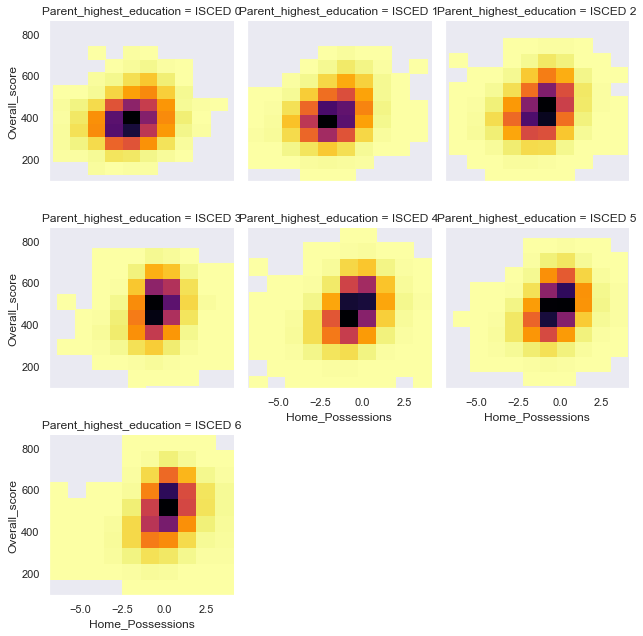

In [174]:
# create faceted heat maps on levels of the cut variable
g = sns.FacetGrid(data = df, col = 'Parent_highest_education', col_wrap = 3, height = 3)
g.map(hist2dgrid, 'Home_Possessions', 'Overall_score', color = 'inferno_r')
g.set_xlabels('Home_Possessions')
g.set_ylabels('Overall_score')

plt.show()

*Faceted heat map across home possessions and overall score by parent highest education indicates slight positive trend - the higher the parent education, the higher home possession index the higher the overall score is.*

### A dodged point plot for parent highest education, overall score and OECD country

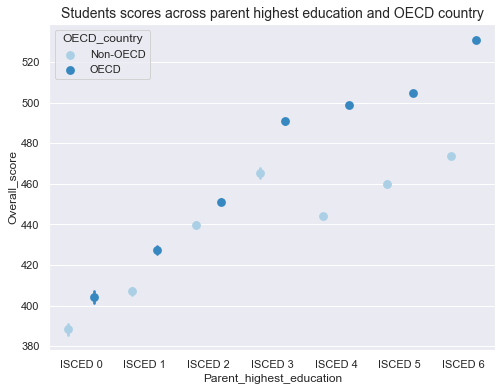

In [364]:
# Plot dodged point plot
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = df, x = 'Parent_highest_education', y = 'Overall_score', hue = 'OECD_country',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Students scores across parent highest education and OECD country', fontsize = 14)
ax.set_yticklabels([],minor = True)
plt.show();

### A dodged point plot for parent highest education, overall score and OECD country - yaxis adjusted to 0

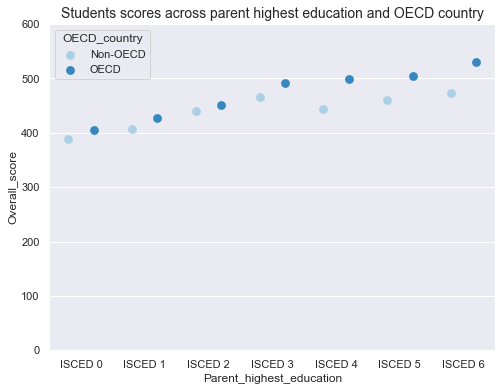

In [365]:
# Plot dodged point plot
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = df, x = 'Parent_highest_education', y = 'Overall_score', hue = 'OECD_country',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Students scores across parent highest education and OECD country', fontsize = 14)
ax.set_yticklabels([],minor = True)
ax.set_ylim(ymin=0)
ax.set_ylim(ymax=600)
plt.show();

*After adjusting the dodged point plot’s x axis to 0, we can still observe the differences in overall scores in parent highest education’s categories. There are slight differences in countries that joined the OECD. Those differences are more distinct in categories with higher education.*

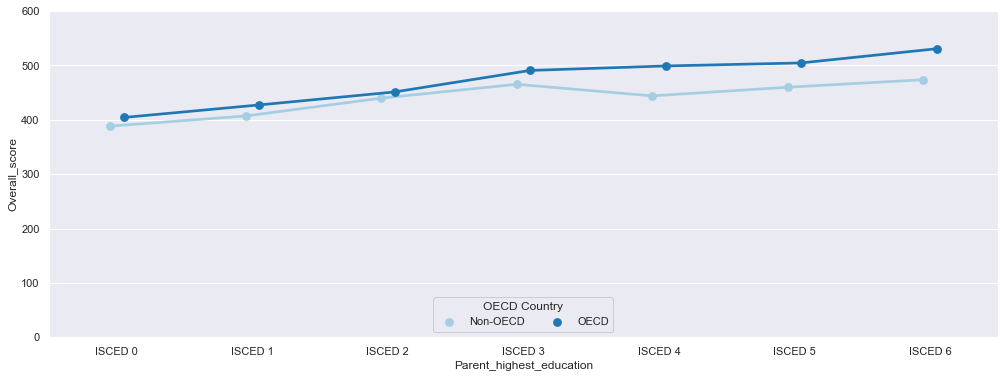

In [342]:
# Plot dodged line plot
plt.figure(figsize = [17, 6])
ax = sns.pointplot(data = df, 
                  x = 'Parent_highest_education', y = 'Overall_score', hue = 'OECD_country',
                  dodge = 0.1, palette = sns.color_palette('Paired')
                 )
ax.set_ylim(ymin=0)
ax.set_ylim(ymax=600)
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'OECD Country');

*Since the differences are not very distinct, a line plot for the same variables might be a better choice. A line chart clearly shows the increase of student’s scores with parent higher education.*

### Box plots for overall score, parent highest education and gender

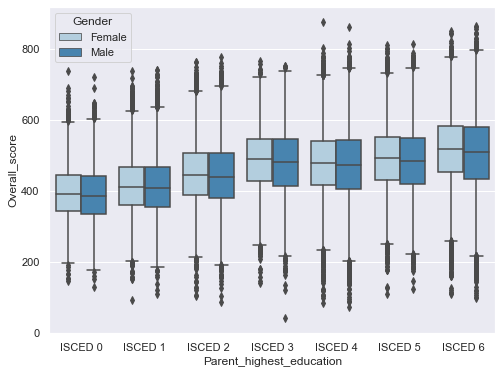

In [176]:
# Plot box plots
fig = plt.figure(figsize = [8,6])
ax = sns.boxplot(data = df, x = 'Parent_highest_education', y = 'Overall_score', hue = 'Gender',
           palette = 'Blues', dodge = 0.4)
ax.set_yticklabels([],minor = True)
plt.show();

*There is no significant difference between genders when comparing overall score and parent education.*

### Error bar plor for overall score, skipping school day and gender

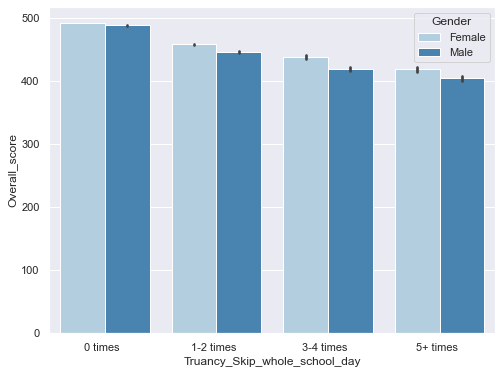

In [376]:
# Plor error bar plot
fig = plt.figure(figsize = [8,6])
ax = sns.barplot(data = df, x = 'Truancy_Skip_whole_school_day', y = 'Overall_score', hue = 'Gender',
           palette = 'Blues')
plt.show();

*From the error bar chart we can see that females have slightly higher scores in all categories of skipping school days. Across all categories female and male students receive higher scores when not skipping any school day.*

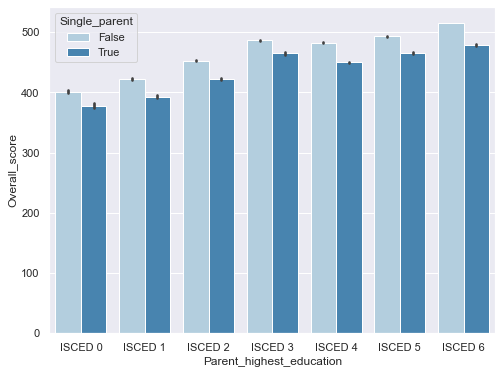

In [378]:
# Plor error bar plot
fig = plt.figure(figsize = [8,6])
ax = sns.barplot(data = df, x = 'Parent_highest_education', y = 'Overall_score', hue = 'Single_parent',
           palette = 'Blues')
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this section I continued to explore the relationship between home possessions and overall scores. When plotting a multivariate heat map for parent highest education those differences became even more obvious. The higher the parent education and home possession index the higher the overall score is. 
Another interesting observation is the comparison of countries that joined OECD and the one who didn’t. From the chart above we can see differences in student’s scores - students from the countries that joined OECD have higher scores than students from the countries that didn’t join OECD. 


### Were there any interesting or surprising interactions between features?

We can see an interesting observation from the error bar chart. Female students have slightly higher scores in all categories of skipping school days. Across all categories female and male students receive higher scores when not skipping any school day.